DLE305 - Assessment 3

Saeed - Wang - Nguyen

References

https://www.kdnuggets.com/2019/07/convolutional-neural-networks-python-tutorial-tensorflow-keras.html

https://github.com/StrikingLoo/Cats-and-dogs-classifier-tensorflow-CNN/blob/master/Convolutional_experiments.ipynb

In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from PIL import Image
import glob
from collections import defaultdict
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
IMG_SIZE = (94, 125)
def pixels_from_path(file_path):
    im = Image.open(file_path)
    
    im = im.resize(IMG_SIZE)
    np_im = np.array(im)
    #matrix of pixel RGB values
    return np_im

In [3]:
shape_counts = defaultdict(int)
for i, cat in enumerate(glob.glob('C:/Users/alisa/Desktop/images/train/images/train/cat*')[:1000]):
    if i%100==0:
        print(i)
    img_shape = pixels_from_path(cat).shape
    shape_counts[str(img_shape)]= shape_counts[str(img_shape)]+ 1

0
100
200
300
400
500
600
700
800
900


In [4]:
shape_items = list(shape_counts.items())
shape_items.sort(key = lambda x: x[1])
shape_items.reverse()

In [5]:
# 10% of the data will automatically be used for validation
validation_size = 0.1
img_size = IMG_SIZE # resize images to be 374x500 (most common shape)
num_channels = 3 # RGB
sample_size = 8192 #We'll use 8192 pictures (2**13)

In [40]:
SAMPLE_SIZE = 200
print("loading training cat images...")
cat_train_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('C:/Users/alisa/Desktop/images/train/images/train/cat*')[:SAMPLE_SIZE]])
print("loading training dog images...")
dog_train_set = np.asarray([pixels_from_path(dog) for dog in glob.glob('C:/Users/alisa/Desktop/images/train/images/train/dog*')[:SAMPLE_SIZE]])
print("loading training lion images...")
lion_train_set = np.asarray([pixels_from_path(lion) for lion in glob.glob('C:/Users/alisa/Desktop/images/train/images/train/lion*')[:SAMPLE_SIZE]])
print("loading training tiger images...")
tiger_train_set = np.asarray([pixels_from_path(tiger) for tiger in glob.glob('C:/Users/alisa/Desktop/images/train/images/train/tiger*')[:SAMPLE_SIZE]])

loading training cat images...
loading training dog images...
loading training lion images...
loading training tiger images...


In [41]:
valid_size = 40
print("loading validation cat images...")
cat_valid_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('C:/Users/alisa/Desktop/images/train/images/train/cat*')[-valid_size:]])
print("loading validation dog images...")
dog_valid_set = np.asarray([pixels_from_path(dog) for dog in glob.glob('C:/Users/alisa/Desktop/images/train/images/train/dog*')[-valid_size:]])
print("loading validation lion images...")
lion_valid_set = np.asarray([pixels_from_path(lion) for lion in glob.glob('C:/Users/alisa/Desktop/images/train/images/train/lion*')[-valid_size:]])
print("loading validation tiger images...")
tiger_valid_set = np.asarray([pixels_from_path(tiger) for tiger in glob.glob('C:/Users/alisa/Desktop/images/train/images/train/tiger*')[-valid_size:]])

loading validation cat images...
loading validation dog images...
loading validation lion images...
loading validation tiger images...


===============================================================================================
- Modified label assignment to accommodate multiple classes. Instead of using only 0 and 1 as labels, using class labels  0, 1, 2, and 3.
- to_categorical: for use with multiple classes.
- Combined the training and validation sets into x_all and labels_all arrays.
- Changed the loss function to 'categorical_crossentropy' to handle the multi-class classification 

===============================================================================================

In [42]:
x_train = np.concatenate([cat_train_set, dog_train_set, lion_train_set, tiger_train_set])
labels_train = np.asarray([1 for _ in range(SAMPLE_SIZE)]+[0 for _ in range(SAMPLE_SIZE)] +[2 for _ in range(SAMPLE_SIZE)] +[3 for _ in range(SAMPLE_SIZE)])

In [43]:
x_valid = np.concatenate([cat_valid_set, dog_valid_set, lion_valid_set, tiger_valid_set])
labels_valid = np.asarray([1 for _ in range(valid_size)]+[0 for _ in range(valid_size)] +[2 for _ in range(valid_size)] +[3 for _ in range(valid_size)])

In [44]:
# Combine train and validation sets
x_all = np.concatenate([x_train, x_valid])
labels_all = np.concatenate([labels_train, labels_valid])

In [45]:
# Convert labels to categorical format
num_classes = 4  # Number of classes: cat, dog, lion, tiger
labels_categorical = to_categorical(labels_all, num_classes)

# Run of the Mill

In [46]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 4  # Number of classes: cat, dog, lion, tiger

total_pixels = img_size[0] * img_size[1] * 3
fc_size = 512

In [47]:
inputs = keras.Input(shape=(img_size[1], img_size[0], 3), name='ani_image')
x = layers.Flatten(name='flattened_img')(inputs)  # Turn image to vector.
x = layers.Dense(fc_size, activation='relu', name='first_layer')(x)
outputs = layers.Dense(num_classes, activation='softmax', name='class')(x) 

In [48]:
model = keras.Model(inputs=inputs, outputs=outputs)

customAdam = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=customAdam,
              loss="categorical_crossentropy",  # Categorical cross-entropy for multi-class
              metrics=["accuracy"])

print('# Fit model on training data')

# Convert labels to categorical format
labels_train_categorical = to_categorical(labels_train, num_classes)
labels_valid_categorical = to_categorical(labels_valid, num_classes)

history = model.fit(x_train,
                    labels_train_categorical,
                    batch_size=32,
                    shuffle=True,
                    epochs=10,
                    validation_data=(x_valid, labels_valid_categorical))

# Fit model on training data
Epoch 1/10
25/25 [==============================] - 2s 60ms/step - loss: 5339.7251 - accuracy: 0.3375 - val_loss: 1098.3080 - val_accuracy: 0.4125
Epoch 2/10
25/25 [==============================] - 1s 54ms/step - loss: 1368.8163 - accuracy: 0.3837 - val_loss: 2018.7653 - val_accuracy: 0.3625
Epoch 3/10
25/25 [==============================] - 1s 57ms/step - loss: 1138.2456 - accuracy: 0.4525 - val_loss: 3379.9995 - val_accuracy: 0.2500
Epoch 4/10
25/25 [==============================] - 1s 54ms/step - loss: 1833.2395 - accuracy: 0.3487 - val_loss: 1463.5938 - val_accuracy: 0.4625
Epoch 5/10
25/25 [==============================] - 1s 55ms/step - loss: 999.1973 - accuracy: 0.4575 - val_loss: 1130.6475 - val_accuracy: 0.3875
Epoch 6/10
25/25 [==============================] - 1s 56ms/step - loss: 823.5663 - accuracy: 0.4963 - val_loss: 909.8801 - val_accuracy: 0.3688
Epoch 7/10
25/25 [==============================] - 1s 52ms/step - loss: 508.7521 - accuracy

1/1 [==============================] - 0s 27ms/step


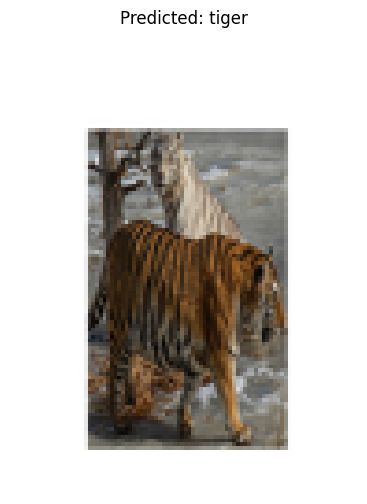

In [51]:
import matplotlib.pyplot as plt

# Load and preprocess the test image
test_image_path = 'C:/Users/alisa/Desktop/images/train/images/train/tiger144.jpg'  # Replace with the actual path
test_image = pixels_from_path(test_image_path)
test_image = test_image / 255.0  # Normalize pixel values

# Make predictions using the model
predictions = model.predict(test_image.reshape(1, *test_image.shape))

# Interpret the results
predicted_class = np.argmax(predictions)
class_labels = ['cat', 'dog', 'lion', 'tiger']
predicted_label = class_labels[predicted_class]

# Display the test image and predicted label
plt.figure(figsize=(6, 6))
plt.imshow(test_image)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

# Single Convolutional Layer

In [52]:
fc_layer_size = 128
img_size = IMG_SIZE

conv_inputs = keras.Input(shape=(img_size[1], img_size[0], 3), name='ani_image')
conv_layer = layers.Conv2D(24, kernel_size=3, activation='relu')(conv_inputs)
conv_layer = layers.MaxPool2D(pool_size=(2, 2))(conv_layer)
conv_x = layers.Flatten(name='flattened_features')(conv_layer)

conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)
conv_outputs = layers.Dense(num_classes, activation='softmax', name='class')(conv_x)  # Softmax for multi-class

conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)

customAdam = keras.optimizers.Adam(learning_rate=1e-6)
conv_model.compile(optimizer=customAdam,
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

In [53]:
print('# Fit model on training data')

history = conv_model.fit(x_train, 
                    labels_train_categorical,
                    batch_size=32, 
                    shuffle = True,
                    epochs=5,
                    validation_data=(x_valid, labels_valid_categorical))

# Fit model on training data
Epoch 1/5
25/25 [==============================] - 4s 125ms/step - loss: 19.6107 - accuracy: 0.2675 - val_loss: 15.1761 - val_accuracy: 0.2812
Epoch 2/5
25/25 [==============================] - 3s 116ms/step - loss: 12.4529 - accuracy: 0.3338 - val_loss: 12.5601 - val_accuracy: 0.3313
Epoch 3/5
25/25 [==============================] - 3s 118ms/step - loss: 10.4165 - accuracy: 0.3875 - val_loss: 10.2778 - val_accuracy: 0.3438
Epoch 4/5
25/25 [==============================] - 3s 110ms/step - loss: 9.2781 - accuracy: 0.4013 - val_loss: 9.7884 - val_accuracy: 0.3875
Epoch 5/5
25/25 [==============================] - 3s 112ms/step - loss: 8.2200 - accuracy: 0.4350 - val_loss: 8.6573 - val_accuracy: 0.3313


In [66]:
# Load and preprocess the test image
test_image_path = 'C:/Users/alisa/Desktop/images/train/images/train/dog.5332.jpg'
test_image = pixels_from_path(test_image_path)
test_image = test_image.reshape(1, *test_image.shape)  # Reshape to match model input shape
test_image = test_image / 255.0  # Normalize pixel values

In [67]:
predictions = conv_model.predict(test_image)

1/1 [==============================] - 0s 21ms/step


In [68]:
# Interpret the results
predicted_class = np.argmax(predictions)
class_labels = ['cat', 'dog', 'lion', 'tiger']
predicted_label = class_labels[predicted_class]

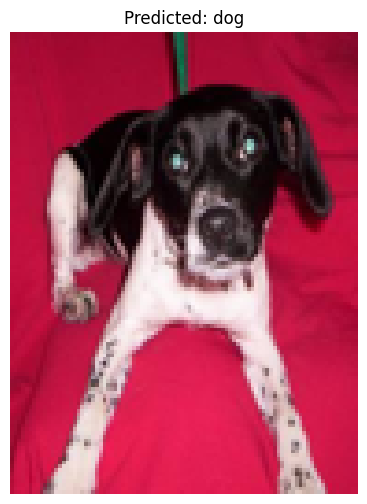

In [69]:
# Display the test image and predicted label
plt.figure(figsize=(6, 6))
plt.imshow(test_image[0])
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

# Bigger Convolutional Model

In [73]:
fc_layer_size = 256
img_size = IMG_SIZE

conv_inputs = keras.Input(shape=(img_size[1], img_size[0], 3), name='ani_image')
conv_layer = layers.Conv2D(48, kernel_size=3, activation='relu')(conv_inputs)
conv_layer = layers.MaxPool2D(pool_size=(2, 2))(conv_layer)

conv_layer = layers.Conv2D(48, kernel_size=3, activation='relu')(conv_layer)
conv_layer = layers.MaxPool2D(pool_size=(2, 2))(conv_layer)

conv_x = layers.Flatten(name='flattened_features')(conv_layer)

conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)
conv_outputs = layers.Dense(num_classes, activation='softmax', name='class')(conv_x)  # Softmax for multi-class

conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)

customAdam = keras.optimizers.Adam(learning_rate=1e-6)
conv_model.compile(optimizer=customAdam,
                   loss="categorical_crossentropy",  # Use categorical cross-entropy for multi-class
                   metrics=["accuracy"])

In [74]:
print('# Fit model on training data')

history = conv_model.fit(x_train, 
                    labels_train_categorical,
                    batch_size=64, 
                    shuffle = True,
                    epochs=15,
                    validation_data=(x_valid, labels_valid_categorical))

# Fit model on training data
Epoch 1/15
13/13 [==============================] - 6s 388ms/step - loss: 11.9287 - accuracy: 0.2962 - val_loss: 7.6733 - val_accuracy: 0.2812
Epoch 2/15
13/13 [==============================] - 5s 359ms/step - loss: 7.7582 - accuracy: 0.2912 - val_loss: 7.0612 - val_accuracy: 0.3375
Epoch 3/15
13/13 [==============================] - 5s 356ms/step - loss: 6.5714 - accuracy: 0.3113 - val_loss: 6.2443 - val_accuracy: 0.3562
Epoch 4/15
13/13 [==============================] - 5s 350ms/step - loss: 5.9565 - accuracy: 0.3237 - val_loss: 5.8113 - val_accuracy: 0.3438
Epoch 5/15
13/13 [==============================] - 5s 352ms/step - loss: 5.3903 - accuracy: 0.3475 - val_loss: 5.3478 - val_accuracy: 0.3438
Epoch 6/15
13/13 [==============================] - 4s 341ms/step - loss: 5.0207 - accuracy: 0.3713 - val_loss: 5.1012 - val_accuracy: 0.3438
Epoch 7/15
13/13 [==============================] - 4s 340ms/step - loss: 4.6666 - accuracy: 0.3800 - val_loss: 4.7285

In [75]:
# Load and preprocess the test image
test_image_path = 'C:/Users/alisa/Desktop/images/train/images/train/dog.1256.jpg'
test_image = pixels_from_path(test_image_path)
test_image = test_image.reshape(1, *test_image.shape)  # Reshape to match model input shape
test_image = test_image / 255.0  # Normalize pixel values

In [76]:
predictions = conv_model.predict(test_image)

1/1 [==============================] - 0s 60ms/step


In [77]:
# Interpret the results
predicted_class = np.argmax(predictions)
class_labels = ['cat', 'dog', 'lion', 'tiger']
predicted_label = class_labels[predicted_class]

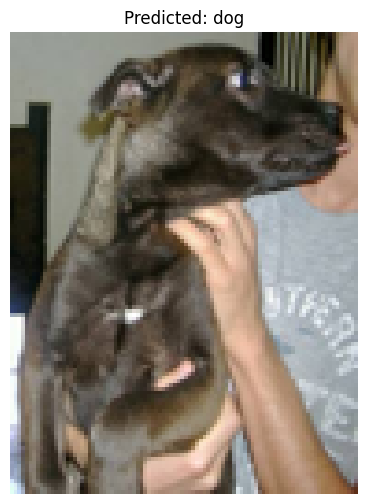

In [78]:
# Display the test image and predicted label
plt.figure(figsize=(6, 6))
plt.imshow(test_image[0])
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

# Huge Model

In [80]:
fc_layer_size = 256
img_size = IMG_SIZE

conv_inputs = keras.Input(shape=(img_size[1], img_size[0], 3), name='ani_image')
conv_layer = layers.Conv2D(128, kernel_size=3, activation='relu')(conv_inputs)
conv_layer = layers.MaxPool2D(pool_size=(2, 2))(conv_layer)

conv_layer = layers.Conv2D(128, kernel_size=3, activation='relu')(conv_layer)
conv_layer = layers.MaxPool2D(pool_size=(2, 2))(conv_layer)

conv_x = layers.Flatten(name='flattened_features')(conv_layer)

conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)
conv_outputs = layers.Dense(num_classes, activation='softmax', name='class')(conv_x)  # Softmax for multi-class

huge_conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)

customAdam = keras.optimizers.Adam(learning_rate=1e-6)
huge_conv_model.compile(optimizer=customAdam,
                        loss="categorical_crossentropy",  # Use categorical cross-entropy for multi-class
                        metrics=["accuracy"])

In [81]:
print('# Fit model on training data')

history = huge_conv_model.fit(x_train, 
                    labels_train_categorical,
                    batch_size=64, 
                    shuffle = True,
                    epochs=5,
                    validation_data=(x_valid, labels_valid_categorical))

# Fit model on training data
Epoch 1/5
13/13 [==============================] - 15s 1s/step - loss: 12.7147 - accuracy: 0.2763 - val_loss: 6.5213 - val_accuracy: 0.2500
Epoch 2/5
13/13 [==============================] - 14s 1s/step - loss: 6.2926 - accuracy: 0.2763 - val_loss: 4.6262 - val_accuracy: 0.3187
Epoch 3/5
13/13 [==============================] - 14s 1s/step - loss: 4.4696 - accuracy: 0.3587 - val_loss: 4.0644 - val_accuracy: 0.3125
Epoch 4/5
13/13 [==============================] - 15s 1s/step - loss: 3.8060 - accuracy: 0.3762 - val_loss: 3.7167 - val_accuracy: 0.3562
Epoch 5/5
13/13 [==============================] - 15s 1s/step - loss: 3.5330 - accuracy: 0.4013 - val_loss: 3.4152 - val_accuracy: 0.3438


In [212]:
# Load and preprocess the test image
test_image_path = 'C:/Users/alisa/Desktop/images/train/images/train/cat.66.jpg'
test_image = pixels_from_path(test_image_path)
test_image = test_image.reshape(1, *test_image.shape)  # Reshape to match model input shape
test_image = test_image / 255.0  # Normalize pixel values

In [213]:
predictions = conv_model.predict(test_image)

1/1 [==============================] - 0s 27ms/step


In [214]:
# Interpret the results
predicted_class = np.argmax(predictions)
class_labels = ['cat', 'dog', 'lion', 'tiger']
predicted_label = class_labels[predicted_class]

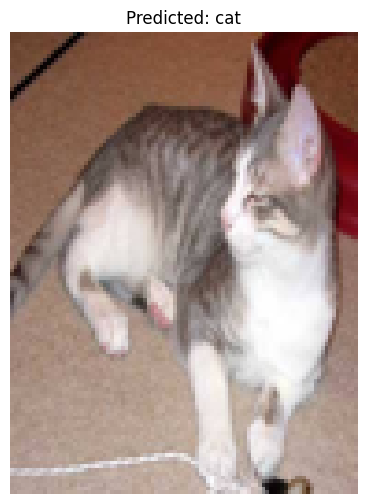

In [215]:
# Display the test image and predicted label
plt.figure(figsize=(6, 6))
plt.imshow(test_image[0])
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

# Using Pretrained Model with Augmented Data

- Performance improvement might be limited by the small dataset

In [113]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

For above code:
- Random rotation of the image by up to 20 degrees.
- Random horizontal and vertical shifts of the image by up to 20% of its width and height.
- Randomly flipping the image horizontally or vertically.

In [114]:
# Pretrained model
base_model = VGG16(include_top=False, input_shape=(img_size[1], img_size[0], 3))
for layer in base_model.layers:
    layer.trainable = False

- layer.trainable set to false = This freezes the layers, preventing them from being updated during training. Useful because the lower layers of the  model already contain useful feature extractors.
- uses the VGG16 architecture as a pretrained model for feature extraction. The idea is to leverage the learned features from the VGG16 model.
- include_top = False = Final fully connected layers are not included. To let us add own classification layer.

In [115]:
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(fc_layer_size, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout for regularization
x = BatchNormalization()(x)  # Batch normalization
outputs = layers.Dense(4, activation='softmax')(x)  # Use 'softmax' activation

- Dropout (0.5) randomly sets a fraction of input units to 0 during training to prevent overfitting.
- BatchNormalizaztion = added to normalize the activations of the previous layer, improving training stability.
- Dense =  layer with a single unit and sigmoid activation is added for binary classification

In [116]:
model = keras.Model(inputs=base_model.input, outputs=outputs)

In [117]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical cross-entropy
              metrics=['accuracy'])

- adam optimizer is a widely used optimization algorithm.
- binary_crossentropy = loss function

FOR CODE BELOW:
- datagen.flow function = generates batches of augmented training data.
- steps_per_epoch parameter = determines how many batches are processed in each epoch.
- epochs parameter = number of training epochs.
- validation_data parameter = provides validation dataset to monitor performance during training.

In [118]:
# Training with data augmentation
history = model.fit(datagen.flow(x_train, labels_train_categorical, batch_size=64),
                    steps_per_epoch=len(x_train) // 64,
                    epochs=50,
                    validation_data=(x_valid, labels_valid_categorical),
                    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/50
12/12 [==============================] - 16s 1s/step - loss: 1.2689 - accuracy: 0.5149 - val_loss: 1.8935 - val_accuracy: 0.7063
Epoch 2/50
12/12 [==============================] - 17s 1s/step - loss: 0.7858 - accuracy: 0.6861 - val_loss: 1.2916 - val_accuracy: 0.7750
Epoch 3/50
12/12 [==============================] - 18s 2s/step - loss: 0.6654 - accuracy: 0.7065 - val_loss: 0.8910 - val_accuracy: 0.8188
Epoch 4/50
12/12 [==============================] - 19s 2s/step - loss: 0.5782 - accuracy: 0.7500 - val_loss: 0.6505 - val_accuracy: 0.8375
Epoch 5/50
12/12 [==============================] - 20s 2s/step - loss: 0.5583 - accuracy: 0.7565 - val_loss: 0.5457 - val_accuracy: 0.8625
Epoch 6/50
12/12 [==============================] - 18s 2s/step - loss: 0.5905 - accuracy: 0.7595 - val_loss: 0.5603 - val_accuracy: 0.8562
Epoch 7/50
12/12 [==============================] - 18s 1s/step - loss: 0.5816 - accuracy: 0.7636 - val_loss: 0.5937 - val_accuracy: 0.8375
Epoch 8/50
12/12 [==

In [143]:
test_image_path = 'C:/Users/alisa/Desktop/images/train/images/train/cat.82.jpg'
test_image = pixels_from_path(test_image_path)
test_image = test_image.reshape(1, *test_image.shape)  # Reshape to match model input shape
test_image = test_image / 255.0  # Normalize pixel values

In [144]:
predictions = model.predict(test_image)

1/1 [==============================] - 0s 59ms/step


In [145]:
# Interpret the results
predicted_class = np.argmax(predictions)
class_labels = ['cat', 'dog', 'lion', 'tiger']  # Adjust as needed
predicted_label = class_labels[predicted_class]

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(test_image[0])
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

# Larger Model using Pretrained Model/Data Augmentation

- Added an additional fully connected layer after the first one. This can allow the model to capture more complex relationships in the data.

- Added an additional dropout layer after the new fully connected layer. This provides more regularization to prevent overfitting.

- Applied batch normalization after the first fully connected layer. This can help stabilize and speed up training.

- Kept the dropout after the original fully connected layer for regularization.

- Maintained the pretrained VGG16 base model for feature extraction.

In [165]:
# Combine train and validation sets
x_all = np.concatenate([x_train, x_valid])
labels_all = np.concatenate([labels_train, labels_valid])

In [166]:
# One-hot encode the labels
num_classes = 4  # Number of classes (cats, dogs, lions, tigers)
labels_all_categorical = to_categorical(labels_all, num_classes=num_classes)

In [167]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

In [168]:
# Pretrained model
base_model = VGG16(include_top=False, input_shape=(img_size[1], img_size[0], 3))
for layer in base_model.layers:
    layer.trainable = False

In [169]:
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(fc_layer_size, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout for regularization
x = BatchNormalization()(x)  # Batch normalization
x = layers.Dense(fc_layer_size, activation='relu')(x)  # Additional fully connected layer
x = Dropout(0.3)(x)  # Additional dropout
outputs = layers.Dense(4, activation='softmax')(x)

In [170]:
model = keras.Model(inputs=base_model.input, outputs=outputs)

In [171]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical cross-entropy
              metrics=['accuracy'])

In [173]:
# Training with data augmentation
history = model.fit(datagen.flow(x_all, labels_all_categorical, batch_size=64),
                    steps_per_epoch=len(x_all) // 64,
                    epochs=50,
                    callbacks=[EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)])

Epoch 1/50
15/15 [==============================] - 17s 1s/step - loss: 0.4084 - accuracy: 0.8229
Epoch 2/50
15/15 [==============================] - 19s 1s/step - loss: 0.3904 - accuracy: 0.8354
Epoch 3/50
15/15 [==============================] - 19s 1s/step - loss: 0.3963 - accuracy: 0.8417
Epoch 4/50
15/15 [==============================] - 18s 1s/step - loss: 0.4045 - accuracy: 0.8365
Epoch 5/50
15/15 [==============================] - 20s 1s/step - loss: 0.3848 - accuracy: 0.8406
Epoch 6/50
15/15 [==============================] - 19s 1s/step - loss: 0.3635 - accuracy: 0.8333
Epoch 7/50
15/15 [==============================] - 19s 1s/step - loss: 0.3737 - accuracy: 0.8354
Epoch 8/50
15/15 [==============================] - 19s 1s/step - loss: 0.4513 - accuracy: 0.8010
Epoch 9/50
15/15 [==============================] - 19s 1s/step - loss: 0.3920 - accuracy: 0.8281
Epoch 10/50
15/15 [==============================] - 19s 1s/step - loss: 0.3422 - accuracy: 0.8531
Epoch 11/50
15/15 [

In [180]:
test_image_path = 'C:/Users/alisa/Desktop/images/train/images/train/cat.7321.jpg'
test_image = pixels_from_path(test_image_path)
test_image = test_image.reshape(1, *test_image.shape)  # Reshape to match model input shape
test_image = test_image / 255.0  # Normalize pixel values

In [181]:
predictions = model.predict(test_image)

1/1 [==============================] - 0s 47ms/step


In [182]:
# Interpret the results
predicted_class = np.argmax(predictions)
class_labels = ['cat', 'dog', 'lion', 'tiger']  # Adjust as needed
predicted_label = class_labels[predicted_class]

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(test_image[0])
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()